# Data Science Capstone Project-Healthcare
**Problem Statement:**
*NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

*The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
*Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 

**Dataset Description**
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

**Variables	- Description**
* Pregnancies -	Number of times pregnant
* Glucose - Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure	- Diastolic blood pressure (mm Hg)
* SkinThickness	- Triceps skinfold thickness (mm)
* Insulin - Two hour serum insulin
* BMI - Body Mass Index
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age in years
* Outcome - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### Project Task: Week 1:

**Data Exploration:**
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

        • Glucose
        • BloodPressure
        • SkinThickness
        • Insulin
        • BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

**Data Exploration:**

4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
6. Perform correlation analysis. Visually explore it using a heat map.

### Project Task: Week 2

**Data Modeling:**

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 
2. Apply an appropriate classification algorithm to build a model.
3. Compare various models with the results from KNN algorithm.
4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.
Please be descriptive to explain what values of these parameter you have used.

**Data Reporting:**

5. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
     a. Pie chart to describe the diabetic or non-diabetic population
     b. Scatter charts between relevant variables to analyze the relationships
     c. Histogram or frequency charts to analyze the distribution of the data
     d. Heatmap of correlation analysis among the relevant variables
     e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble         chart.

## Week 1:
### Data Exploration:
#### Import Required Libraries and Read the Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from io import StringIO

In [3]:
#Load the dataset
data = pd.read_csv('health care diabetes.csv')

### Data Preprocessing (EDA)
#### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
#Checking random samples for descripancies
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
522,6,114,0,0,0,0.0,0.189,26,0
603,7,150,78,29,126,35.2,0.692,54,1
639,1,100,74,12,46,19.5,0.149,28,0
702,1,168,88,29,0,35.0,0.905,52,1
205,5,111,72,28,0,23.9,0.407,27,0
79,2,112,66,22,0,25.0,0.307,24,0
66,0,109,88,30,0,32.5,0.855,38,1
202,0,108,68,20,0,27.3,0.787,32,0
314,7,109,80,31,0,35.9,1.127,43,1
563,6,99,60,19,54,26.9,0.497,32,0


#### Observations:
We notice some columns in the dataset contain values as '0'.

data.columns

In [7]:
# show dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# checking for missing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
# Display the statistical summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
#Checking for duplicates
data.duplicated().sum()  

0

#### Observations:
From the above statistics, we can see that the minimum value for columns Glucose, BloodPressure, SkinThickness, Insulin and BMI is 0 which can't be practically possible for these variables. This implies missing values, hence need to update it to NaN.

#### 2.Visually explore these variables using histograms. Treat the missing values accordingly.

In [13]:
Positive = data[data['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


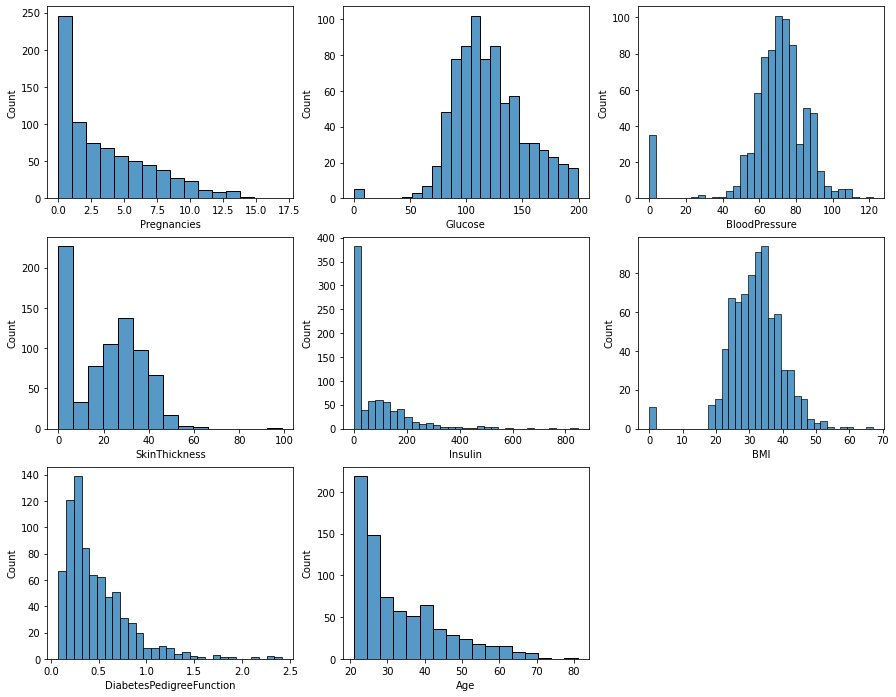

In [14]:
#Checking distribution of variables
plt.figure(figsize=(15,12))
for i in range(8):
    plt.subplot(3,3,i+1)
    sns.histplot(data.iloc[:,i]) 

##### Observations:
From the above density plot, we can see that the data is mostly skewed. Hence we shall replace the missing values with respective 'Median' values. The spikes seen at zero are missing values

In [15]:
#Updating 0 values to nan
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

data[data[cols] ==  0] = np.nan

In [16]:
#Re-checking Missing Values
data.isna().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
# Treating null values using Simple Imputer with Median Strategy

from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')

df = pd.DataFrame(impute.fit_transform(data), columns = data.columns)

In [18]:
df.isna().sum() #No missing values now

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 3.There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

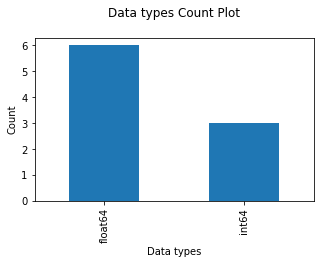

In [19]:
data.dtypes.value_counts().plot(kind='bar', figsize=(5,3),title = 'Data types Count Plot\n', xlabel='Data types', ylabel= 'Count');
plt.show()

##### Observations:
Based on the count plot, we can see that the dataset has three integer variables and six float variables.

#### 4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [20]:
df.Outcome.value_counts(normalize=True)*100

0.0    65.104167
1.0    34.895833
Name: Outcome, dtype: float64

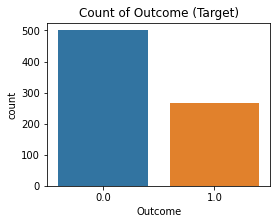

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(x ='Outcome', data = df)
plt.title("Count of Outcome (Target)")
plt.show()

##### Observations: 
Approximately 35% of patients in the dataset have diabetes, while 65% are non-diabetic.

#### 5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [22]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']
Pregnancies = Positive['Pregnancies']
Age = Positive ['Age']

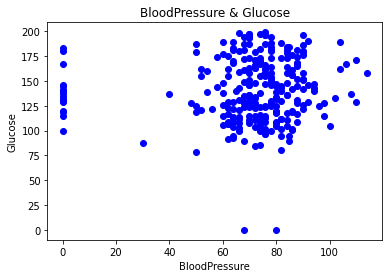

In [23]:
plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

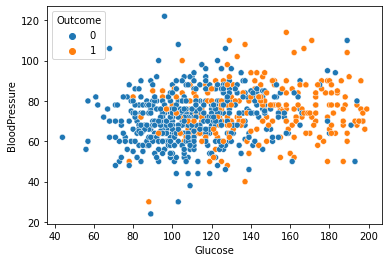

In [24]:
G =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=data);

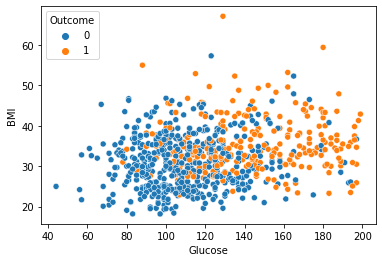

In [25]:
G =sns.scatterplot(x= "Glucose" ,y= "BMI",
              hue="Outcome",
              data=data);

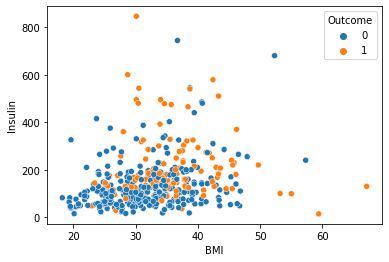

In [26]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=data);

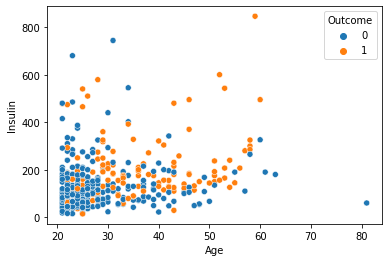

In [27]:
B =sns.scatterplot(x= "Age" ,y= "Insulin",
              hue="Outcome",
              data=data);

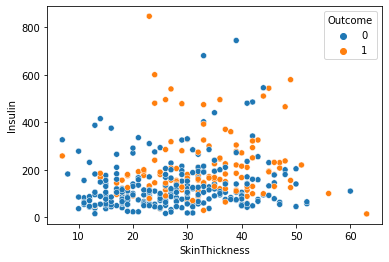

In [28]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=data);

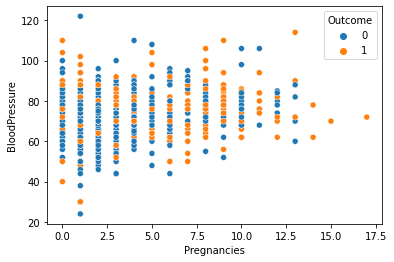

In [29]:
S =sns.scatterplot(x= "Pregnancies" ,y= "BloodPressure",
              hue="Outcome",
              data=data);

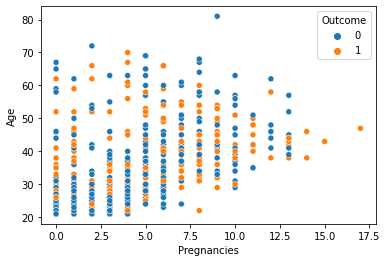

In [30]:
S =sns.scatterplot(x= "Pregnancies" ,y= "Age",
              hue="Outcome",
              data=data);

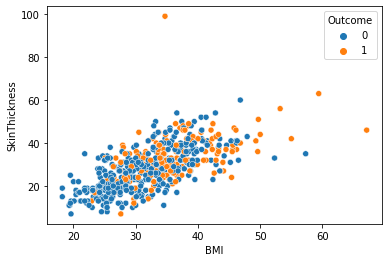

In [31]:
S =sns.scatterplot(x= "BMI" ,y= "SkinThickness",
              hue="Outcome",
              data=data);

#### 6.Perform correlation analysis. Visually explore it using a heat map.

In [32]:
### correlation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


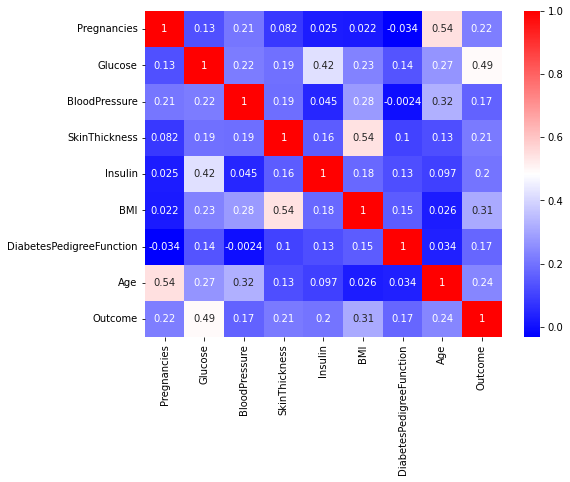

In [33]:
#Correlation analysis using Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='bwr',annot = True)
plt.show()

#### Observations:
Our analysis of the Scatter plot and Heatmap found some noteworthy correlations worth mentioning."BMI" and "SkinThickness" are positively correlated, as are "Age" and "Pregnancies," with "Age" also slightly correlated to "Blood Pressure.""Insulin" and "Glucose" are moderately correlated, but "Outcome" shows the most significant correlation with "Glucose." There is also a slight correlation between "Outcome" and "BMI." No pairs of variables have negative correlations.

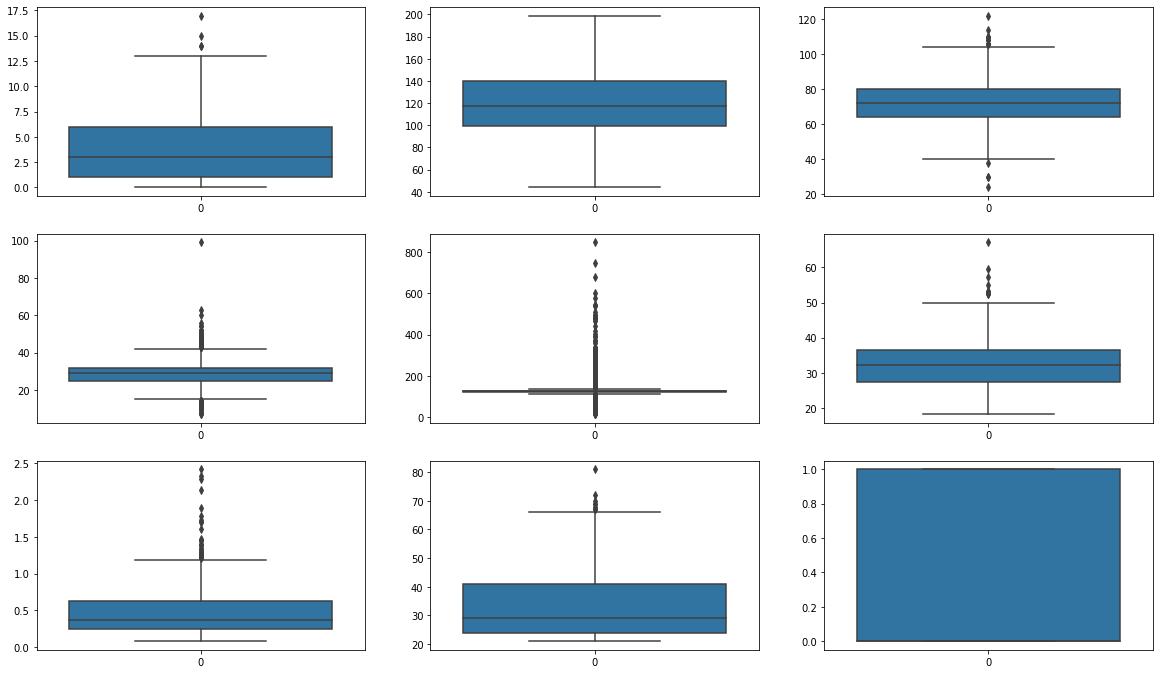

In [34]:
#Checking for outliers

plt.figure(figsize=(20,16))
for i in range(len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(df.iloc[:,i])

#### Observations:
We noticed a large number of outliers in the Insulin column, so we will be treating them with the Capping method. However, we will not be altering the outlier values for the other columns, as they seem to be genuine.

In [35]:
#Treating Outliers In "Insulin"
#we are changing the quantile value to 85% and 15% as there are lot of outliers with 75% and 25% and we dont want to lose lot of information capping them.

Q3 = df.Insulin.quantile(0.85)
Q1 = df.Insulin.quantile(0.15)
IQR = Q3-Q1
upper = Q3 + 1.5 * (IQR)
lower = Q3 - 1.5 * (IQR)
print(lower,upper)

39.12500000000006 320.67499999999967


In [36]:
#index of outliers
index_upper = df[df.Insulin > upper].index
index_lower = df[df.Insulin < lower].index

#Capping to upper and lower values
df.loc[index_upper,'Insulin'] = upper
df.loc[index_lower,'Insulin'] = lower

## Project Task: Week 2

### Data Modeling:


####  1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

To build a reliable machine learning classification model for a Diabetes dataset, we need to evaluate its performance using appropriate validation techniques.
We can split the dataset into training and testing sets or use cross-validation technique, which partitions the data into subsets and tests the model on each of them.
We can also use grid search to find the optimal set of hyperparameters for the best performance.

Evaluating the model's performance using parameters such as sensitivity, specificity, and AUC (ROC curve) can help us identify its accuracy in predicting positive and negative cases. Sensitivity measures the proportion of true positive cases to actual positive cases, specificity measures the proportion of true negative cases to actual negative cases, and AUC measures the model's ability to distinguish between positive and negative cases.
By calculating these parameters, we can make informed decisions on how to improve our model's performance.

In [37]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

In [42]:
norm=lambda a:(a-min(a))/(max(a)-min(a))
df_norm=df.iloc[:,:-1]
df_normalized=df_norm.apply(norm)

##### Applying K-Fold Cross Validation with no Normalization & Standardization, with Normalization and with Standardisation

##### K-Fold Cross Validation with no Normalization & Standardization

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators= 10) 
Accuracy = cross_val_score(rf_class, x, y, scoring= 'accuracy', cv = 10).mean()*100
print("Accuracy of K fold is :", Accuracy)

Accuracy of K fold is : 73.69104579630896


##### K-Fold Cross Validation with no Normalization

In [44]:
Accuracy = cross_val_score(rf_class, df_normalized, y, scoring= 'accuracy', cv = 10).mean()*100
print("Accuracy of K fold is :", Accuracy)

Accuracy of K fold is : 73.70300751879701


##### K-Fold Cross Validation with Standardization

In [45]:
x_std=Scale.fit_transform(x)

Accuracy = cross_val_score(rf_class, x_std, y, scoring= 'accuracy', cv = 10).mean()*100
print("Accuracy of K fold is :", Accuracy)

Accuracy of K fold is : 74.87354750512645


##### so we can clearly see that Accuracy with Normalization is better then standardization

In [46]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

In [47]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


##### The data is mostly numerical, making Logistic Regression a good choice. I'll explore other algorithms like Decision Tree, SVM, Random Forest, Naive Bayes, and K-Fold Cross Validation to improve accuracy. For validation, I'll use train-test split and measure accuracy with the confusion matrix. I'll also consider ROC Curve and ROC AUC Score to avoid Type 2 Error for Positive class.

#### 2. Apply an appropriate classification algorithm to build a model. 
#### 3. Compare various models with the results from KNN.
#### 4.. Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc.
#### Please be descriptive to explain what values of these parameter you have used.

### Buliding Classification Models

### KNN

In [61]:
#KNN With Standard Scaling

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

In [53]:
knn_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [54]:
from sklearn import metrics

In [55]:
matrix = metrics.confusion_matrix(y_test_norm, knn_model.predict(x_test_norm))
print(matrix)

[[82 25]
 [15 32]]


Model Validation ==>

Accuracy Score of KNN Model::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       107
         1.0       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154
 


 ROC Curve


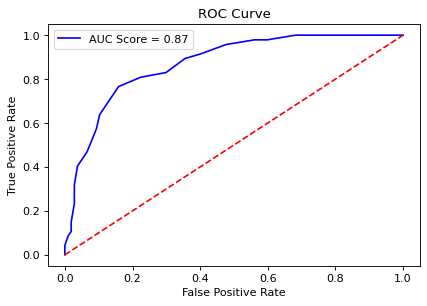

In [56]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_test_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### KNN With Normalization

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(x_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(x_test_norm)

In [59]:
matrix = metrics.confusion_matrix(y_test_norm, knn_model_norm.predict(x_test_norm))
print(matrix)

[[96 11]
 [17 30]]


Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       107
         1.0       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154
 


 ROC Curve


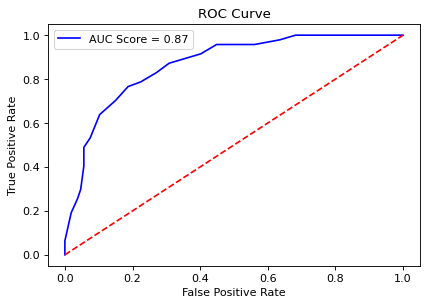

In [60]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm, knn_model_norm.predict(x_test_norm)))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model_norm.predict_proba(x_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### We can clearly see that KNN with Normalization is better than  Standardization , So later i will build models using Z Score Normalization and will compare with KNN

### LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [64]:
model.fit(x_train_norm,y_train_norm)

LogisticRegression()

In [65]:
y_pred = model.predict(x_test_norm)
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [66]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_norm, model.predict(x_test_norm))
print(matrix)

[[98  9]
 [20 27]]


Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       107
         1.0       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154
 


 ROC Curve


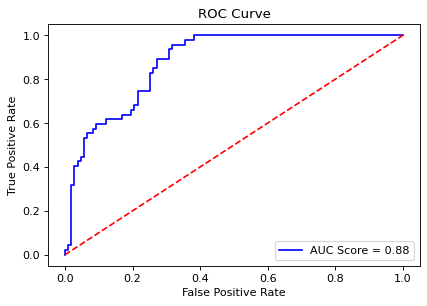

In [67]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test_norm, model.predict(x_test_norm)))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,y_pred),'\n')
print("\n","ROC Curve")
lr_prob=model.predict_proba(x_test_norm)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### We can see that Logistic Regression is better model than KNN Normalization based on Accuracy and AUC score

### Decsion Tree classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
classifier = DecisionTreeClassifier(criterion= 'entropy')

In [70]:
classifier.fit(x_train_norm, y_train_norm)

DecisionTreeClassifier(criterion='entropy')

In [71]:
y_pred = classifier.predict(x_test_norm)
y_pred

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1.])

In [72]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_norm, model.predict(x_test_norm))
print(matrix)

[[98  9]
 [20 27]]


Model Validation ==>

Accuracy Score of Decision Tree Model::
0.7467532467532467

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       107
         1.0       0.58      0.64      0.61        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154
 


 ROC Curve


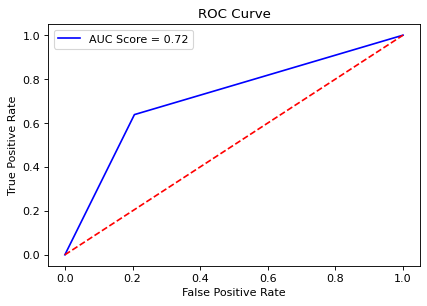

In [73]:
print("Model Validation ==>\n")
print("Accuracy Score of Decision Tree Model::")
print(metrics.accuracy_score(y_test_norm, classifier.predict(x_test_norm)))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,y_pred),'\n')
print("\n","ROC Curve")
lr_prob=classifier.predict_proba(x_test_norm)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
RFclassifier = RandomForestClassifier(criterion= 'entropy', n_estimators= 100)

In [76]:
RFclassifier.fit(x_train_norm, y_train_norm)

RandomForestClassifier(criterion='entropy')

In [78]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_norm, RFclassifier.predict(x_test_norm))
print(matrix)

[[93 14]
 [17 30]]


In [79]:
y_pred = RFclassifier.predict(x_test_norm)
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

Model Validation ==>

Accuracy Score of Random Forest Model::
0.7987012987012987

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       107
         1.0       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154
 


 ROC Curve


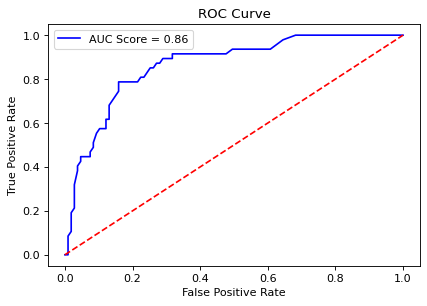

In [80]:
print("Model Validation ==>\n")
print("Accuracy Score of Random Forest Model::")
print(metrics.accuracy_score(y_test_norm, RFclassifier.predict(x_test_norm)))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,y_pred),'\n')
print("\n","ROC Curve")
lr_prob=RFclassifier.predict_proba(x_test_norm)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### We can see that Random Forest better than Decision Tree, Logistic Regression and KNN with Normalization based on Accuracy,Precision, Recall & AUC Score.

### Support Vector Machines

In [81]:
from sklearn.svm import SVC 
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True) 
svc_model_linear.fit(x_train_norm, y_train_norm)
svc_pred=svc_model_linear.predict(x_test_norm)

In [82]:
svc_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [83]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_norm, svc_model_linear.predict(x_test_norm))
print(matrix)

[[97 10]
 [21 26]]


Model Validation ==>

Accuracy Score of Support Vector Machines with Linear Kernel::
0.7987012987012987

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       107
         1.0       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154
 


 ROC Curve


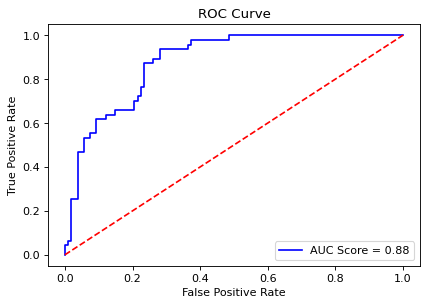

In [84]:
print("Model Validation ==>\n")
print("Accuracy Score of Support Vector Machines with Linear Kernel::")
print(metrics.accuracy_score(y_test_norm, svc_model_linear.predict(x_test_norm)))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,svc_pred),'\n')
print("\n","ROC Curve")
lr_prob=svc_model_linear.predict_proba(x_test_norm)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [85]:
from sklearn.svm import SVC
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True) 
svc_model_rbf.fit(x_train_norm, y_train_norm)
svc_pred_rbf=svc_model_rbf.predict(x_test_norm)

In [86]:
svc_pred_rbf

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [87]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_norm, svc_model_rbf.predict(x_test_norm))
print(matrix)

[[97 10]
 [20 27]]


Model Validation ==>

Accuracy Score of Support Vector Machines with RBF Kernel::
0.8051948051948052

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       107
         1.0       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154
 


 ROC Curve


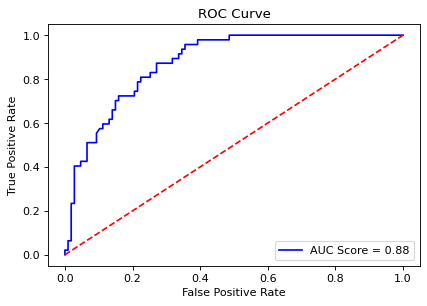

In [90]:
print("Model Validation ==>\n")
print("Accuracy Score of Support Vector Machines with RBF Kernel::")
print(metrics.accuracy_score(y_test, svc_model_rbf.predict(x_test_norm)))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,svc_pred_rbf),'\n')
print("\n","ROC Curve")
svc_prob_linear=svc_model_rbf.predict_proba(x_test_norm)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,svc_prob_linear1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### SVM RBF Kernel is superior to  SVC with Linear Kernel.

##### When comparing KNN with normalization, it has been found that KNN outperforms normalization in terms of accuracy and AUC score.

### Naive Baye’s Classifier

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
gnb = GaussianNB()

In [93]:
gnb.fit(x_train_norm, y_train_norm)

GaussianNB()

In [94]:
y_pred = gnb.predict(x_test_norm)
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [95]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_norm, gnb.predict(x_test_norm))
print(matrix)

[[92 15]
 [18 29]]


Model Validation ==>

Accuracy Score of Naive Baye’s Classifier::
0.7857142857142857

 Classification Report::
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       107
         1.0       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154
 


 ROC Curve


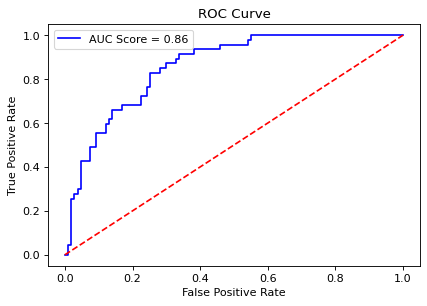

In [96]:
print("Model Validation ==>\n")
print("Accuracy Score of Naive Baye’s Classifier::")
print(metrics.accuracy_score(y_test_norm, gnb.predict(x_test_norm)))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,y_pred),'\n')
print("\n","ROC Curve")
svc_prob_gnb=gnb.predict_proba(x_test_norm)
svc_prob_gnb1=svc_prob_gnb[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,svc_prob_gnb1)
roc_auc_gnb=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_gnb)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### When comparing KNN normalization with other methods, it was found that KNN has higher accuracy and AUC score.

### Summary:
#### Based on the comparison of all models with KNN, it has been observed that KNN Normalization performs better than Decision Tree, Support Vector Machines, and Naive Bayes Classifier in terms of Accuracy, Precision, Recall, and AUC score.
#### Logistic Regression and KNN Normalization exhibit similar results, but Logistic Regression performs better based on AUC score.
#### Random Forest is the best model based on Accuracy, Precision, Recall, and AUC score.

### Final Conclusion

#### Based on our analysis, it appears that the "Random Forest" model is most effective at predicting whether a patient is diabetic or not for this diabetes dataset.

#### Our conclusion is supported by the Accuracy score and other metrics which is highest for Random Forest. Accuracy score measures the performance of a model on a single dataset. We thus select the " "Random Forest Model" as the right model due to high Cross Validation Score and Accuracy Score and also good Precision and Recall and AUC Scores.

#### While other models such as Logistic Regression, KNN, Naive Bayes, Decision tree and Support verctor machines were also implemented, out of which "Logistic Regression" Model has also performed fairly well, while others did not perform as good as RAndom forest and Logistic Regression.

### Data Reporting:
#### 5. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:**

        a. Pie chart to describe the diabetic or non-diabetic population
        b. Scatter charts between relevant variables to analyze the relationships
        c. Histogram or frequency charts to analyze the distribution of the data
        d. Heatmap of correlation analysis among the relevant variables
        e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

#### Please check tableau public dashboard for above data visualization.

In [ ]:
Tableau Public Link of the above Dashboard: 
https://public.tableau.com/app/profile/bhavana.rahangdale/viz/DSCapstoneproject-Healthcare/Dashboard-Diabetes